# Imports

In [2]:
import shap
from utils import fetch_dataset
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from grakel.kernels import ShortestPath, VertexHistogram, EdgeHistogram

# Load datasets

In [11]:
class Model:
    def __init__(self, kernel, dataset_name):
        self.kernel = kernel(normalize=False)
        self.dataset = fetch_dataset(dataset_name, verbose=False)
        self.features = self.kernel.fit(self.dataset.data)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.features.X.toarray(), self.dataset.target, test_size=0.2, shuffle=False)
        self.clf = SVC(kernel='linear')
        self.clf.fit(self.X_train, self.y_train)
        self.y_pred = self.clf.predict(self.X_test)
        self.explainer = shap.Explainer(self.clf.predict, self.X_train)
        self.shap_values = self.explainer(self.X_train)
        print("Accuracy for {} is {}".format(dataset_name, accuracy_score(self.y_test, self.y_pred)))

    def summary_plot(self):
        shap.summary_plot(self.shap_values)

    def force_plot(self, sample_index):
        shap.force_plot(self.shap_values[sample_index], matplotlib=True)

    def bar_plot(self, sample_index):
        shap.bar_plot(self.shap_values.values[sample_index])

    def waterfall_plot(self, sample_index):
        shap.plots.waterfall(self.shap_values[sample_index])

    def heatmap_plot(self):
        shap.plots.heatmap(self.shap_values)

# Shortest path kernel

In [12]:
SP_MUTAG = Model(VertexHistogram, 'MUTAG')

Accuracy for MUTAG is 0.8157894736842105


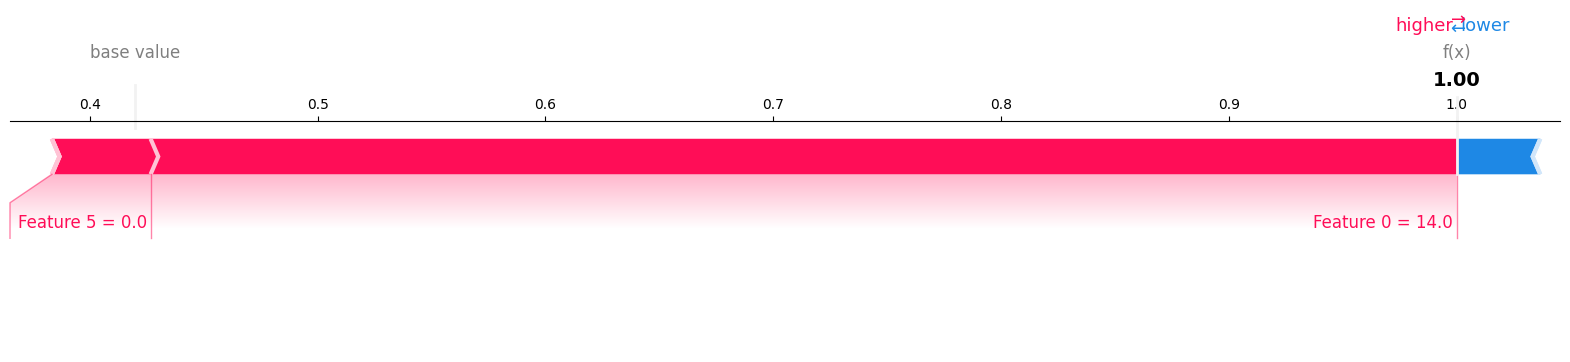

In [13]:
SP_MUTAG.force_plot(0)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


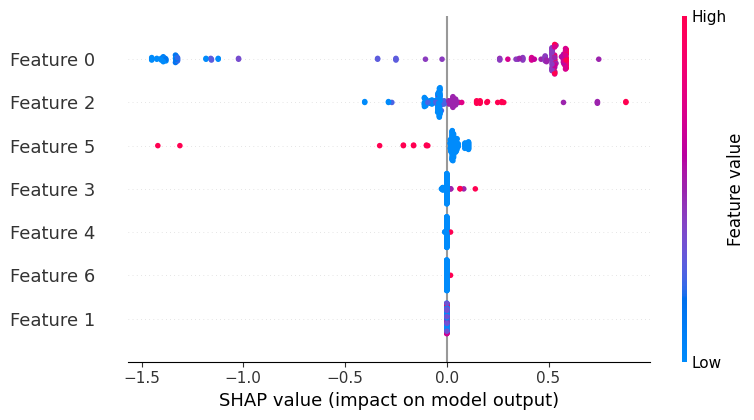

In [14]:
SP_MUTAG.summary_plot()

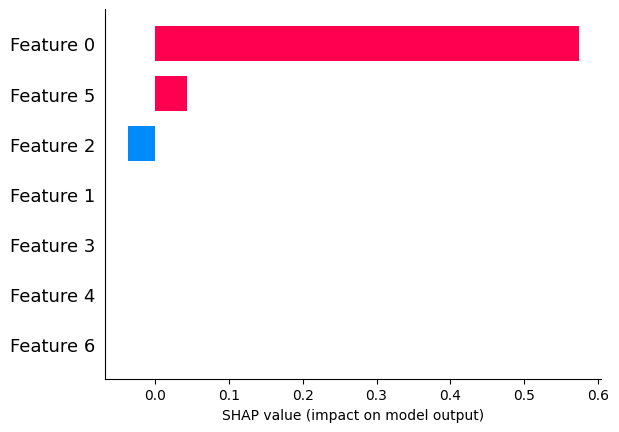

In [15]:
SP_MUTAG.bar_plot(0)

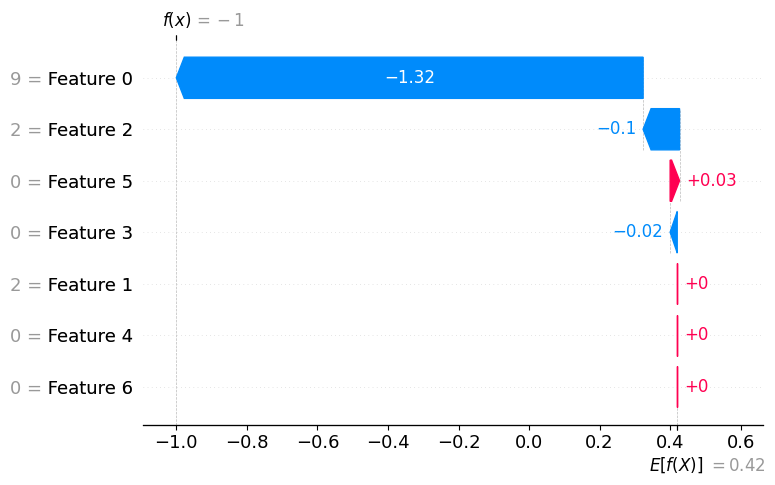

In [16]:
SP_MUTAG.waterfall_plot(1)

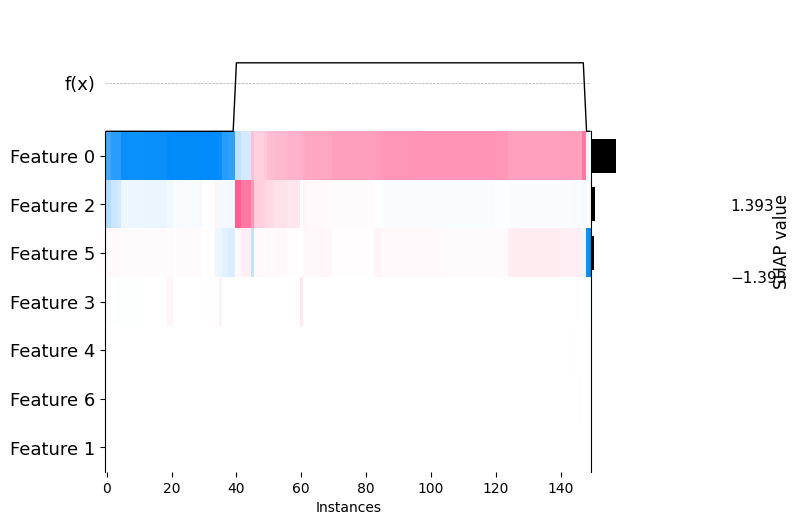

In [17]:
SP_MUTAG.heatmap_plot()

In [3]:
MUTAG = fetch_dataset("MUTAG", verbose=False)